In [26]:
import time

from AntColonyOptimization import AntColonyOptimization
from GeneticAlgorithm import GeneticAlgorithm
from Maze import Maze
from PathSpecification import PathSpecification
from TSPData import TSPData

### Part 1: The Travelling Robot Problem

In [27]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 1000
generations = 200
mutation_rate = 0.085
crossover_probability = 0.85
persist_file = "./../data/optimal_tsp"

# Setup optimization
tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size, mutation_rate, crossover_probability)

# Run optimzation and write to file

solution = ga.solve_tsp(tsp_data)
improvement = ga.population_fitness
tsp_data.write_action_file(solution, "./../data/tsp_solution.txt")

Generation  1
Length of the best route =  3054.9999999999995
Generation  2
Length of the best route =  3054.9999999999995
Generation  3
Length of the best route =  2457.0
Generation  4
Length of the best route =  3054.9999999999995
Generation  5
Length of the best route =  3322.9999999999995
Generation  6
Length of the best route =  3505.0
Generation  7
Length of the best route =  3247.0
Generation  8
Length of the best route =  3191.0
Generation  9
Length of the best route =  3191.0
Generation  10
Length of the best route =  3299.0
Generation  11
Length of the best route =  3165.0000000000005
Generation  12
Length of the best route =  2889.0
Generation  13
Length of the best route =  3021.0
Generation  14
Length of the best route =  3065.0
Generation  15
Length of the best route =  3097.0
Generation  16
Length of the best route =  2897.0
Generation  17
Length of the best route =  3112.9999999999995
Generation  18
Length of the best route =  3219.0
Generation  19
Length of the best rou

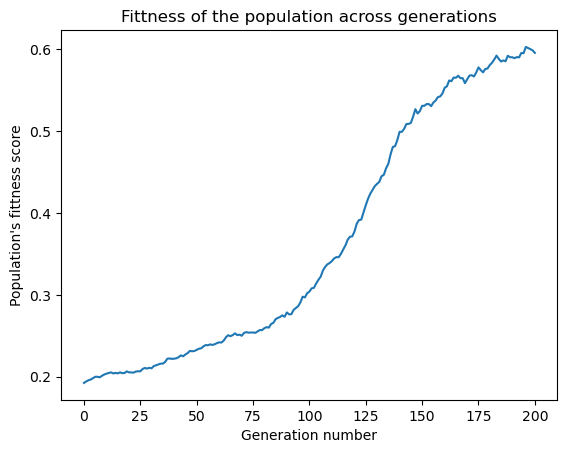

In [28]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(improvement)
plt.title("Fittness of the population across generations")
plt.xlabel("Generation number")
plt.ylabel("Population's fittness score")
plt.show()

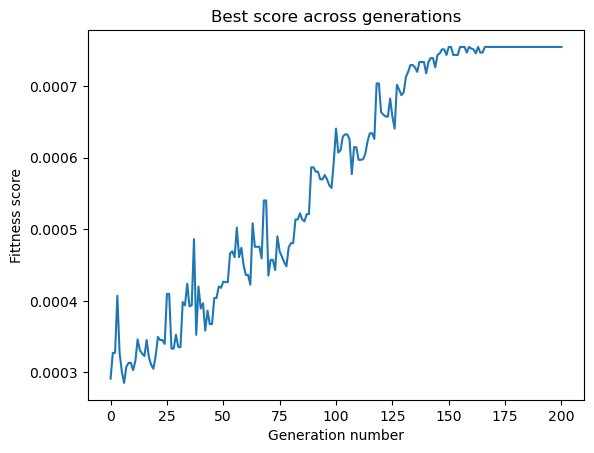

In [29]:
plt.plot(ga.best_route_across_generation)
plt.title("Best score across generations")
plt.xlabel("Generation number")
plt.ylabel("Best fittness score")
plt.show()

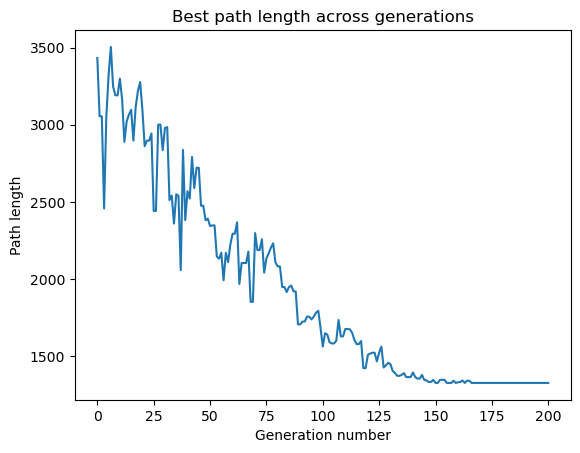

[ 1  2  7  5 14 16  4  9 18  8 10 15 12 13  6 11  3 17]
1325.0


In [30]:
best = ga.population.take_best_chromosome()
# print(ga.best_route_across_generation)
# print(1.0 / np.max(ga.best_route_across_generation))
scores = np.array(ga.best_route_across_generation)
scores = 1.0 / scores
plt.plot(scores)
plt.title("Best path length across generations")
plt.xlabel("Generation number")
plt.ylabel("Best path length")
plt.show()
print(best.get_products())
print(1.0 / best.get_score())

In [20]:
print(tsp_data.get_distances())
print(tsp_data.get_start_distances())
print(tsp_data.get_end_distances())

[[0, 69, 698, 240, 132, 527, 156, 459, 374, 409, 599, 428, 483, 167, 425, 221, 691, 465], [69, 0, 647, 189, 81, 476, 105, 408, 323, 358, 548, 377, 432, 116, 374, 170, 640, 414], [698, 647, 0, 472, 568, 185, 596, 345, 324, 289, 105, 270, 237, 531, 283, 491, 183, 351], [240, 189, 472, 0, 110, 301, 138, 233, 148, 183, 373, 202, 257, 73, 199, 19, 465, 239], [132, 81, 568, 110, 0, 397, 36, 329, 244, 279, 469, 298, 353, 37, 295, 91, 561, 335], [527, 476, 185, 301, 397, 0, 425, 174, 153, 118, 86, 99, 66, 360, 112, 320, 178, 180], [156, 105, 596, 138, 36, 425, 0, 357, 272, 307, 497, 326, 381, 65, 323, 119, 589, 363], [459, 408, 345, 233, 329, 174, 357, 0, 85, 56, 246, 75, 130, 292, 72, 252, 338, 26], [374, 323, 324, 148, 244, 153, 272, 85, 0, 35, 225, 54, 109, 207, 51, 167, 317, 91], [409, 358, 289, 183, 279, 118, 307, 56, 35, 0, 190, 19, 74, 242, 16, 202, 282, 62], [599, 548, 105, 373, 469, 86, 497, 246, 225, 190, 0, 171, 138, 432, 184, 392, 98, 252], [428, 377, 270, 202, 298, 99, 326, 75, 54

In [10]:
from GeneticAlgorithm import Chromosome
from GeneticAlgorithm import Population

chromosome = Chromosome()
chromosome.create_chromosome(4)
print(chromosome.products)
distances = [
    [0, 1, 3, 6],
    [5, 0, 3, 2],
    [9, 4, 0, 8],
    [2, 6, 7 ,0]
]
# print(chromosome.fitness_function(distances))

population = Population(0.1, 0.7, tsp_data)
population.create_random_population(population_size, len(tsp_data.get_start_distances()))
print(population.chromosomes)
print(population.calculate_population_fitness())
print(ga.roulette(population))

[3 1 2 4]
[<GeneticAlgorithm.Chromosome object at 0x000001C79A914430>, <GeneticAlgorithm.Chromosome object at 0x000001C79AD695B0>, <GeneticAlgorithm.Chromosome object at 0x000001C79AD69370>, <GeneticAlgorithm.Chromosome object at 0x000001C79AD5DF70>, <GeneticAlgorithm.Chromosome object at 0x000001C79AD63FA0>, <GeneticAlgorithm.Chromosome object at 0x000001C79AD63850>, <GeneticAlgorithm.Chromosome object at 0x000001C79AD63490>, <GeneticAlgorithm.Chromosome object at 0x000001C79AD63760>, <GeneticAlgorithm.Chromosome object at 0x000001C79AD63430>, <GeneticAlgorithm.Chromosome object at 0x000001C79AD63E20>, <GeneticAlgorithm.Chromosome object at 0x000001C79AD63400>, <GeneticAlgorithm.Chromosome object at 0x000001C79AD63B20>, <GeneticAlgorithm.Chromosome object at 0x000001C79ADC25E0>, <GeneticAlgorithm.Chromosome object at 0x000001C79C1AE0D0>, <GeneticAlgorithm.Chromosome object at 0x000001C79C1AE220>, <GeneticAlgorithm.Chromosome object at 0x000001C79C1B3BB0>, <GeneticAlgorithm.Chromosome 

### Part 2: Path Finding Through Ant Colony Optimization

In [11]:
# Please keep your parameters for the ACO easily changeable here
gen = 1
no_gen = 1
q = 1600
evap = 0.1

# Construct the optimization objects
maze = Maze.create_maze("./../data/hard_maze.txt")
spec = PathSpecification.read_coordinates("./../data/hard_coordinates.txt")
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Save starting time
start_time = int(round(time.time() * 1000))

# Run optimization
shortest_route = aco.find_shortest_route(spec)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

Ready reading maze file ./../data/hard_maze.txt
generation:  0 , best route:  1111 , avg route:  1111.0
Time taken: 0.178
Route size: 1017


### Synthesis

In [12]:
# Please keep your parameters for the synthesis part easily changeable here
gen = 1
no_gen = 1
q = 1000
evap = 0.1

persist_file = "./../tmp/my_tsp"
tsp_path = "./../data/tsp_products.txt"
coordinates = "./../data/hard_coordinates.txt"

# Construct optimization
maze = Maze.create_maze("./../data/hard_maze.txt")
tsp_data = TSPData.read_specification(coordinates, tsp_path)
aco = AntColonyOptimization(maze, gen, no_gen, q, evap)

# Run optimization and write to file
tsp_data.calculate_routes(aco)
tsp_data.write_to_file(persist_file)

# Read from file and print
tsp_data2 = TSPData.read_from_file(persist_file)
print(tsp_data == tsp_data2)

# Solve TSP using your own paths file
ga = GeneticAlgorithm(generations, population_size)
solution = ga.solve_tsp(tsp_data2)
tsp_data2.write_action_file(solution, "./../data/tsp_solution.txt")

Ready reading maze file ./../data/hard_maze.txt
generation:  0 , best route:  0 , avg route:  0.0
generation:  0 , best route:  91 , avg route:  91.0
generation:  0 , best route:  1222 , avg route:  1222.0
generation:  0 , best route:  522 , avg route:  522.0
generation:  0 , best route:  218 , avg route:  218.0
generation:  0 , best route:  849 , avg route:  849.0
generation:  0 , best route:  282 , avg route:  282.0
generation:  0 , best route:  625 , avg route:  625.0
generation:  0 , best route:  508 , avg route:  508.0
generation:  0 , best route:  711 , avg route:  711.0
generation:  0 , best route:  1077 , avg route:  1077.0
generation:  0 , best route:  600 , avg route:  600.0
generation:  0 , best route:  913 , avg route:  913.0
generation:  0 , best route:  269 , avg route:  269.0
generation:  0 , best route:  683 , avg route:  683.0
generation:  0 , best route:  463 , avg route:  463.0
generation:  0 , best route:  1211 , avg route:  1211.0
generation:  0 , best route:  1079

FileNotFoundError: [Errno 2] No such file or directory: './../tmp/my_tsp'